In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/survey.csv', header=0, parse_dates=[0], dayfirst=True)
#zeitstempel = data['Zeitstempel'].dt.date
#zeitstempel

In [3]:
data

,Zeitstempel,Geschlecht,Alter,Höchste abgeschlossene Ausbildung,Studieren Sie derzeit oder haben Sie in der Vergangenheit studiert?,"Arbeiten Sie während Ihres Studiums oder haben Sie während ihres Studiums gearbeitet? Wenn ja,wie viele Stunden pro Woche?",Wie empfinden Sie ihre Work-Life-Balance bezüglich Studium + Arbeit bzw. haben Sie empfunden?,Hat/Hatte Ihre Arbeit während des Studiums direkt etwas mit Ihrem Studium zu tun?,Ist Ihre Arbeit neben dem Studium aus einem verpflichtendem Praktikum entstanden?,Bitte schätzen Sie Ihr ideologisches Weltbild ein.,...,Hat sich Ihr Beziehungstatus seit Beginn der Corona Pandemie (12.03.2020) geändert?,Hatten die Lockdown-Auflagen Auswirkungen auf Ihre aktuelle/damalige Beziehung?,Hatten Sie seit Beginn der Corona Pandemie (12.03.2020) durchschnittlich häufiger Konflikte in Ihrer Beziehung?,Konsumieren Sie Alkohol?,Wie regelmäßig konsumieren Sie Alkohol?,Wie viele Flaschen Bier (1/2l) trinken Sie durchschnittlich in einer Woche?,Wie viele Gläser Wein/Weinmischgetränke (1/8l) trinken Sie durchschnittlich in einer Woche?,"Wie viele Gläser harten Alkohol/Mixgetränke(Vodka,Barcadi….) (2cl) trinken Sie durchschnittlich in einer Woche?",Hat sich Ihr Alkoholkonsum seit Beginn der COVID-19-Pandemie verändert?,Wieso konsumieren Sie keinen Alkohol?
0,2021-03-18 15:06:12,Weiblich,30-39,Masterstudium,Nein,NaN,NaN,NaN,NaN,1,...,"Ja, inzwischen Single","Ja, negativ","Nein, seltener",Ja,selten,0,0,0,3.0,NaN
1,2021-03-18 15:14:14,Weiblich,30-39,Masterstudium,Studium abgeschlossen,Nein (0 Stunden),NaN,NaN,NaN,3,...,Keine Angabe,NaN,NaN,Ja,Selten,1,1,1,3.0,NaN
2,2021-03-18 16:33:16,Männlich,20-29,Bachelorstudium,Aktive/r Student*in,15 - 20 Stunden,Ausgeglichen,Ja,Nein,3,...,"Nein, weiterhin Single",NaN,NaN,Ja,1-3x in der Woche,"0,5",1/2,"0,2",2.0,NaN
3,2021-03-18 21:22:46,Weiblich,20-29,Bachelorstudium,Aktive/r Student*in,9 - 14 Stunden,Ausgeglichen,Nein,NaN,3,...,"Nein, weiterhin in einer Beziehung",Nein,"Weder noch, gleich häufig",Ja,1-3x in der Woche,0,1,0,2.0,NaN
4,2021-03-22 08:08:23,Männlich,20-29,Bachelorstudium,Aktive/r Student*in,Nein (0 Stunden),NaN,NaN,NaN,3,...,"Nein, weiterhin Single",NaN,NaN,Ja,1-3x in der Woche,3,1,4,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,2021-04-25 00:01:16,Weiblich,40-49,Bachelorstudium,Aktive/r Student*in,9 - 14 Stunden,Stressig,Nein,NaN,3,...,"Nein, weiterhin Single",NaN,NaN,Ja,Selten,0,0,0,5.0,NaN
914,2021-04-26 11:24:09,Männlich,30-39,Masterstudium,Studium abgeschlossen,20 - 38 Stunden,Ausgeglichen,Ja,Ja,3,...,"Nein, weiterhin Single",NaN,NaN,Ja,1-3x in der Woche,1,0,0,4.0,NaN
915,2021-04-29 18:12:29,Weiblich,20-29,Masterstudium,Studium abgeschlossen,Nein (0 Stunden),NaN,NaN,NaN,3,...,"Nein, weiterhin in einer Beziehung",Nein,"Ja, häufiger",Ja,Selten,0,1,0,3.0,NaN
916,2021-06-01 18:56:13,Weiblich,30-39,Matura,Aktive/r Student*in,15 - 20 Stunden,Stressig,Nein,NaN,3,...,"Nein, weiterhin in einer Beziehung",Nein,"Weder noch, gleich häufig",Nein,NaN,NaN,NaN,NaN,NaN,Aus gesundheitlichen Gründen


In [6]:
df_counts = zeitstempel.value_counts().sort_index().reset_index()

In [7]:
df_counts

,Zeitstempel,count
0,2021-03-18,4
1,2021-03-22,4
2,2021-03-23,19
3,2021-03-24,2
4,2021-03-25,1
5,2021-03-26,256
6,2021-03-27,48
7,2021-03-28,13
8,2021-03-29,7
9,2021-03-30,39


<Axes: xlabel='Zeitstempel', ylabel='count'>

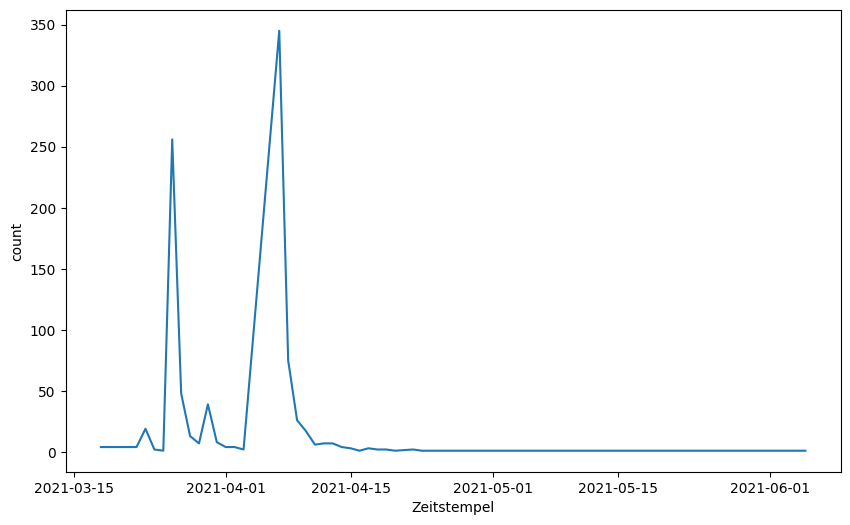

In [8]:
plt.figure(figsize=(10,6))
sns.lineplot(df_counts, y='count', x='Zeitstempel')

<Axes: xlabel='count', ylabel='Zeitstempel'>

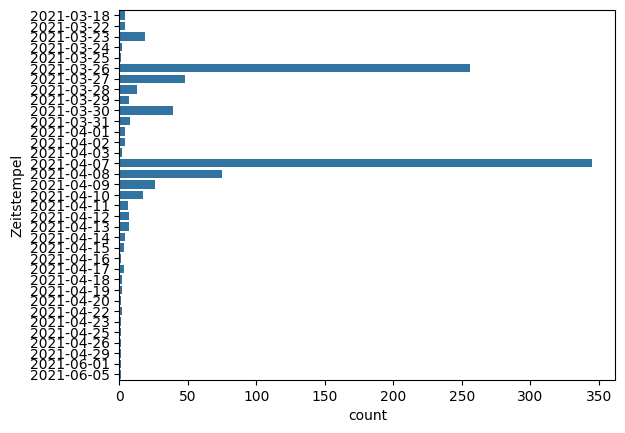

In [14]:
sns.barplot(df_counts, y='Zeitstempel', x='count')
#plt.yticks(rotation=90, ha='right')

In [6]:
def get_data_for_simple_chart(raw_data, question) -> pd.DataFrame:
        data = raw_data[question]
        if pd.api.types.is_datetime64_any_dtype(data):
            data = pd.DataFrame(data.dt.date)
        result_df = data.value_counts().sort_index().reset_index()
        print(result_df)
        return result_df

In [7]:
chart_data = get_data_for_simple_chart(data, 'Geschlecht')
chart_data

  Geschlecht  count
0   Männlich    417
1  Sonstiges      6
2   Weiblich    495


,Geschlecht,count
0,Männlich,417
1,Sonstiges,6
2,Weiblich,495


([<matplotlib.patches.Wedge at 0x1191658e0>,
 [Text(-0.8204750791106016, -0.7326804518741116, 'Männlich'),
  Text(0.6263003354340604, -0.9042941390030036, 'Sonstiges'),
  Text(0.8052588416490334, 0.749371868931612, 'Weiblich')],
 [Text(-0.44753186133305534, -0.39964388284042446, '45.4%'),
  Text(0.3416183647822147, -0.4932513485470928, '0.7%'),
  Text(0.4392320954449273, 0.4087482921445156, '53.9%')])

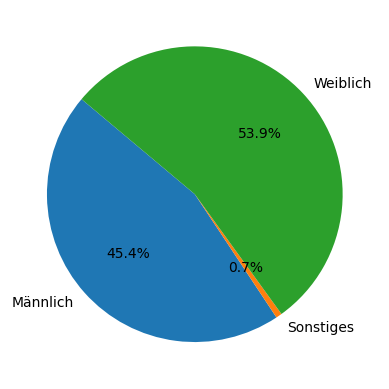

In [16]:
plt.pie(chart_data['count'], labels=chart_data['Geschlecht'], autopct='%1.1f%%', startangle=140)

<Axes: xlabel='Geschlecht', ylabel='count'>

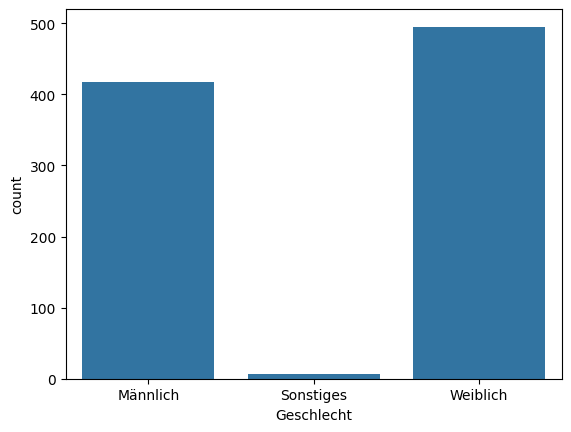

In [18]:
sns.barplot(chart_data, y='count', x='Geschlecht')